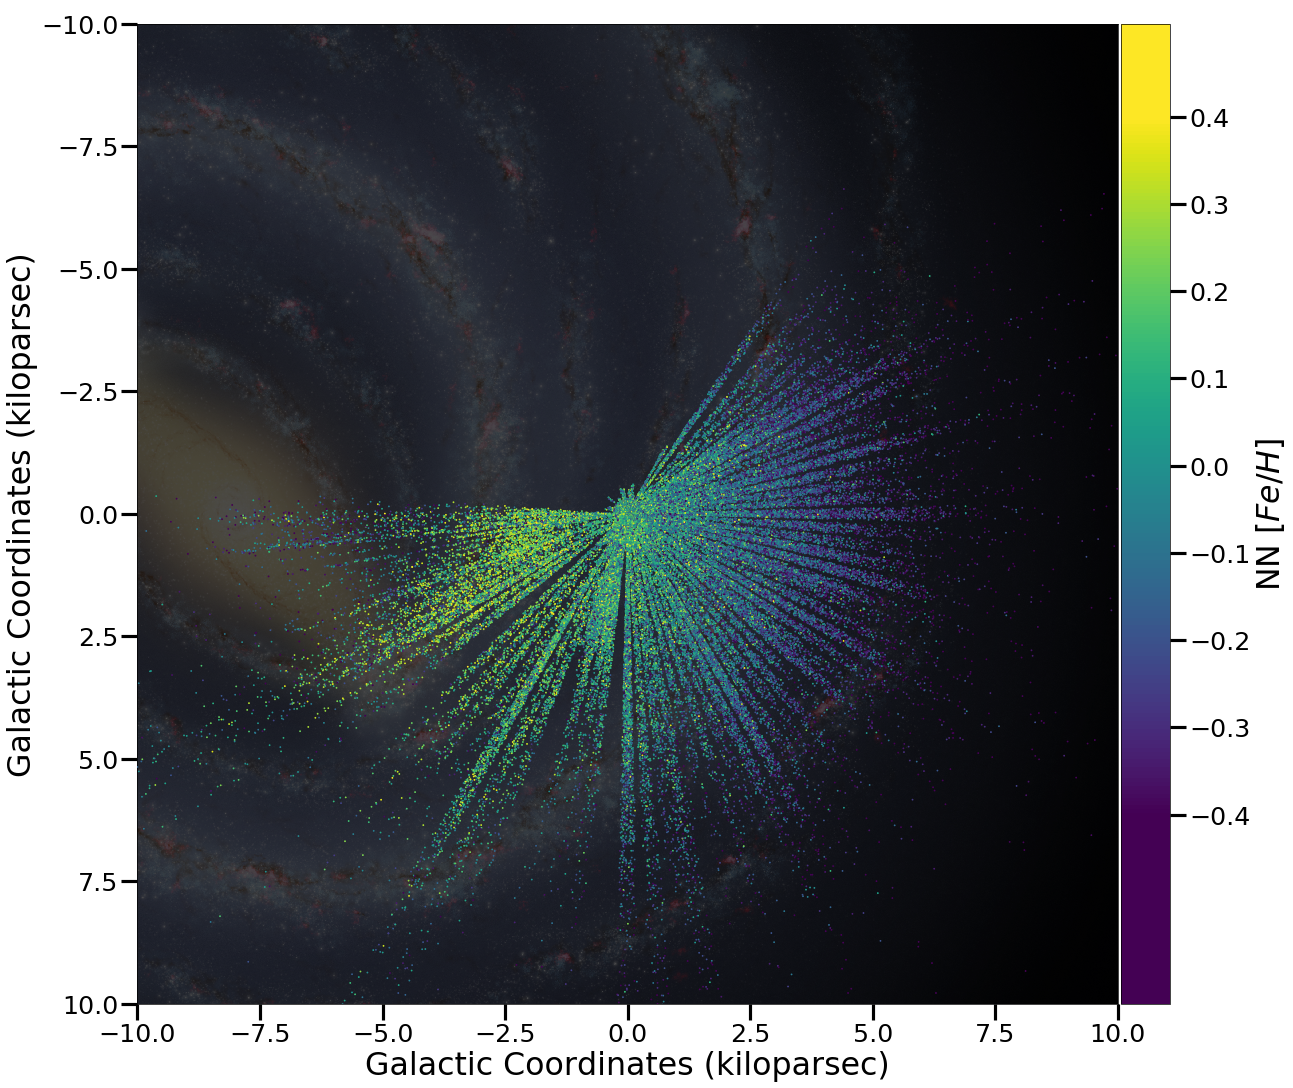

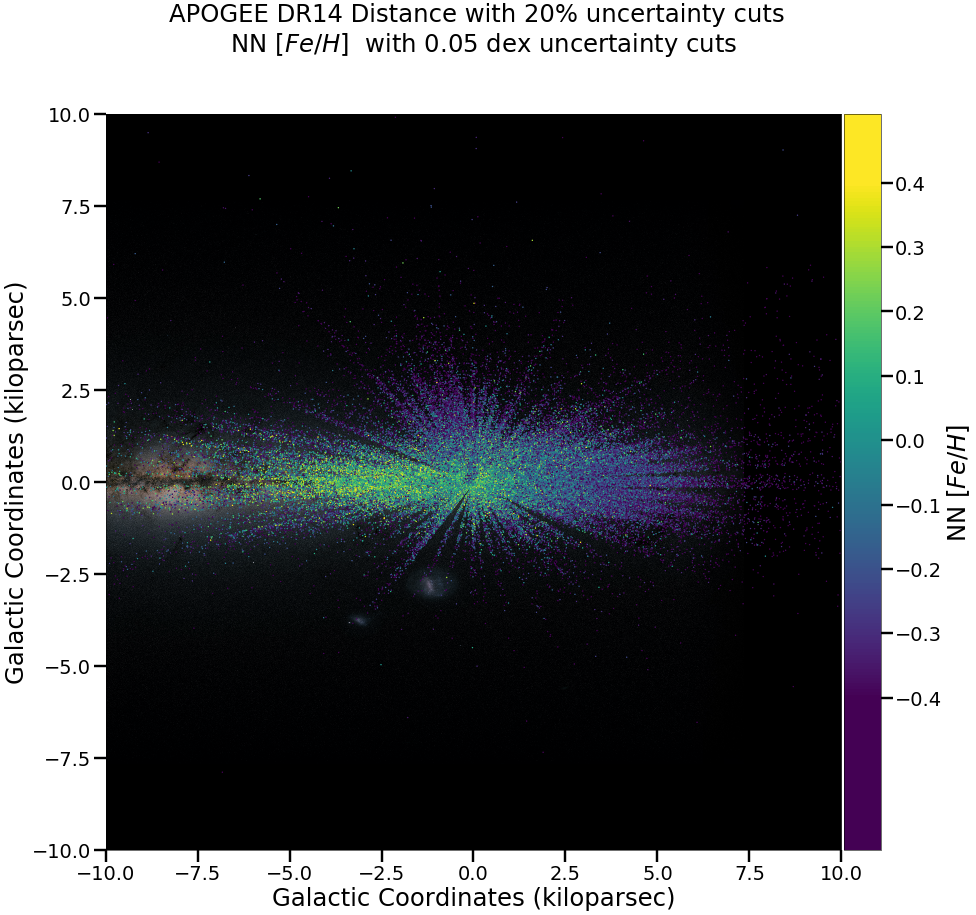

In [5]:
%matplotlib inline
from mw_plot import MWPlot
from astropy.io import fits
from astropy import units as  u
import astropy.coordinates as coords
from astropy.coordinates import CartesianDifferential
import numpy as np
import pylab as plt

f = fits.getdata("apogee_dr14_nn_dist.fits")
nn_distance = f['pc']
nn_distance_error = f['pc_model_error']
ra_j2015_5 = f['RA_J2015.5']  # RA J2015.5
dec_j2015_5 = f['DEC_J2015.5']  # DEC J2015.5

f = fits.getdata("astroNN_apogee_dr14_catalog.fits")
FeH = f["astroNN"][:, 19]
FeH_uncertainty = f["astroNN_error"][:, 19]

non_n9999_idx = ((nn_distance !=-9999.) & 
                 (ra_j2015_5 !=-9999.) &
                 (dec_j2015_5 !=-9999.))

c = coords.SkyCoord(ra=ra_j2015_5[non_n9999_idx]*u.degree,
                    dec=dec_j2015_5[non_n9999_idx]*u.degree,
                    distance=nn_distance[non_n9999_idx]*u.pc,
                    frame='icrs')

good_idx = ((nn_distance[non_n9999_idx] / nn_distance_error[non_n9999_idx] > 5) & 
            (FeH[non_n9999_idx] != -9999.) & 
            (FeH_uncertainty[non_n9999_idx] < 0.05) & 
            (np.abs(c.galactic.cartesian.z.value) < 500))

c2 = c[good_idx]

# setup a MWPlot instance
plot_instance = MWPlot(radius=10 * u.kpc, unit=u.kpc, coord='galactic', annotation=False)

# so that the colorbar will has a better contract
plot_instance.clim = (-0.4, 0.4)
plot_instance.dpi=65

# alpha value for the nmilkyway image
plot_instance.imalpha = 0.3

# set up plot title
# plot_instance.title = 'APOGEE DR14 Distance with 20% uncertainty cuts \n within 0.5kpc from galactic midplane \n NN $[Fe/H]$ with 0.05 dex uncertainty cuts'

# use mw_scatter instead of scatter because we want a colorbar
# need to flip the sign of x because astropy is left-handed but mw_plot is right-handed
plot_instance.mw_scatter(-c2.galactic.cartesian.x, c2.galactic.cartesian.y,
                         [FeH[non_n9999_idx][good_idx], 'NN $[Fe/H]$'])

# plot_instance.tight_layout = False
# Save the figure
plot_instance.savefig(file='nn_feh_mw.pdf')
# =====================================================================================================
good_idx2 = ((nn_distance_error[non_n9999_idx] / nn_distance[non_n9999_idx] < 0.2) & 
             (FeH[non_n9999_idx]!= -9999.) & 
             (FeH_uncertainty[non_n9999_idx] < 0.05))
c3 = c[good_idx2]
# setup a MWPlot instance
plot_instance2 = MWPlot(mode='edge-on', radius=10 * u.kpc, unit=u.kpc, coord='galactic')

# so that the colorbar will has a better contract
plot_instance2.clim = (-0.4, 0.4)
plot_instance2.dpi=50

# alpha value for the milkyway image
plot_instance2.imalpha = 0.6

# set up plot title
plot_instance2.title = 'APOGEE DR14 Distance with 20% uncertainty cuts \n NN $[Fe/H]$  with 0.05 dex uncertainty cuts'

# use mw_scatter instead of scatter because we want a colorbar
# need to flip the sign of x because astropy is left-handed but mw_plot is right-handed
plot_instance2.mw_scatter(-c3.galactic.cartesian.x, c3.galactic.cartesian.z,
                          [FeH[non_n9999_idx][good_idx2], 'NN $[Fe/H]$'])

plot_instance2.tight_layout = False